## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [1]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,P/E Score,ROA Score,PB Score,Leadership Score,Insider Buy Score,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,Sector,Industry,Country,Owned
0,PNDORA.CO,Pandora A/S,Buy,2.01,1.68,0.33,0.88,1.0,-0.2,0.33,0.0,9.97,18.43,66.4,17.59,0.0,Consumer Cyclical,Luxury Goods,Denmark,True


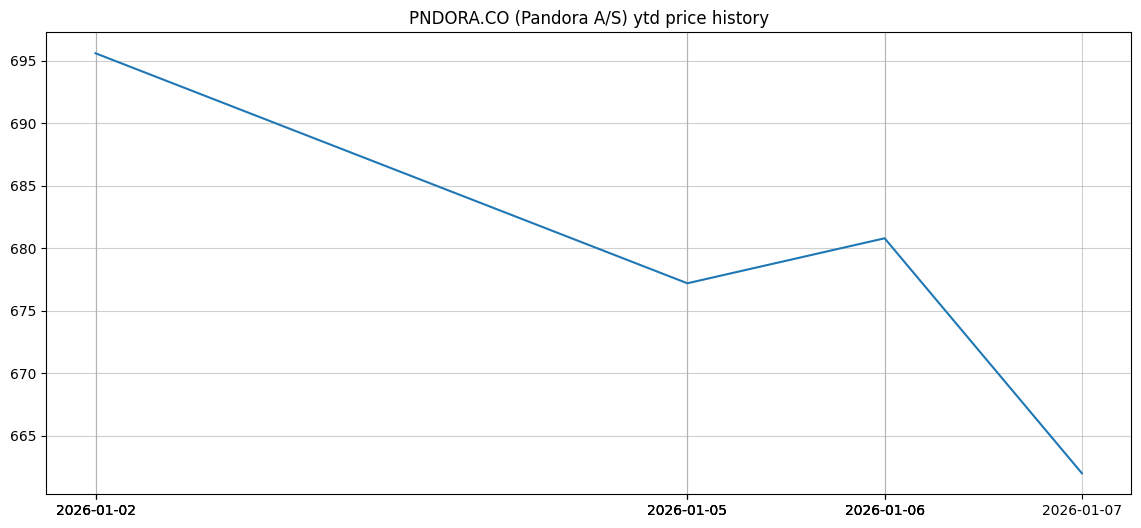

In [3]:
symbol = "PNDORA.CO"
stock = Stock(symbol)
display(stock.summary())
stock.price_graph("ytd")


### Screener

In [4]:
symbol_list = "simple" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Recommendation Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

  0%|          | 0/69 [00:00<?, ?it/s]

100%|██████████| 69/69 [00:47<00:00,  1.45it/s]


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,P/E Score,ROA Score,PB Score,Leadership Score,Insider Buy Score,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,Sector,Industry,Country,Owned
0,BAVA.CO,Bavarian Nordic A/S,Buy,2.51,2.08,0.43,1.04,0.92,0.12,0.43,0.0,6.50,7.78,30.70,1.19,0.0,Healthcare,Biotechnology,Denmark,False
0,ZEAL.CO,Zealand Pharma A/S,Buy,2.09,2.07,0.02,1.09,1.00,-0.02,0.02,0.0,4.64,33.45,91.31,1.97,0.0,Healthcare,Biotechnology,Denmark,True
0,PNDORA.CO,Pandora A/S,Buy,2.01,1.68,0.33,0.88,1.00,-0.20,0.33,0.0,9.97,18.43,66.40,17.59,0.0,Consumer Cyclical,Luxury Goods,Denmark,True
0,TRMD,TORM plc,Buy,1.95,1.76,0.19,0.98,0.65,0.14,0.19,0.0,8.08,5.99,2.73,1.00,0.0,Energy,Oil & Gas Midstream,United Kingdom,True
0,HLUN-A.CO,H. Lundbeck A/S A,Buy,1.94,1.91,0.03,0.89,0.95,0.07,0.03,0.0,9.82,8.28,3.84,1.49,0.0,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,DSV.CO,DSV A/S,Sell,-0.87,-1.13,0.26,-1.18,0.24,-0.18,0.26,0.0,42.20,4.85,39.92,3.45,0.0,Industrials,Integrated Freight & Logistics,Denmark,False
0,BAESY,BAE Systems PLC,Sell,-1.03,-1.22,0.19,-0.99,-0.03,-0.20,0.19,0.0,29.72,4.27,3.52,21.45,0.0,Industrials,Aerospace & Defense,United Kingdom,False
0,SAAB-B.ST,SAAB AB ser. B,Sell,-1.34,-1.55,0.22,-1.20,-0.16,-0.20,0.22,0.0,65.35,3.99,9.59,8.23,0.0,Industrials,Aerospace & Defense,Sweden,False
0,SOLAR-B.CO,Solar B A/S,Sell,-1.55,-1.81,0.26,-1.20,-0.76,0.15,0.26,0.0,57.77,2.15,3.54,0.87,0.0,Technology,Electronics & Computer Distribution,Denmark,False


In [3]:
get_gettables("AAPL")

,0
address1,One Apple Park Way
city,Cupertino
state,CA
zip,95014
country,United States
...,...
fiftyTwoWeekHighChangePercent,-0.098018
fiftyTwoWeekChangePercent,10.770535
dividendDate,1762992000
displayName,Apple
